# E-63 Big Data Analytics - Assignment 09 - TensorFlow

## Shanaka De Soysa

### Problem 1.  
Please considered attached Excel file called  Reduced_Car_Data.xlsx. This is the data set we used previously except that we have now removed several descriptive variables and left only:  Displacement, Horsepower and Weight . Please build a regression model using TensorFlow that will predict the gasoline consumption ( MPG - Miles Per Gallon ) of cars based on three remaining variables. Please extract a percentage of data to serve as a training set and a percentage to serve as the test set.   Please report on the accuracy of your model.

In [1]:
# Import tensorflow and other libraries.
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import math
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import xlrd

%matplotlib inline

In [2]:
# Settings
DATA_FILE = 'data/Reduced_Car_Data.xlsx'
LOG_FILE = 'logs/Reduced_Car_Data'
NUM_OF_EPOCHS = 5000
LEARN_RATE = 1.0e-7

In [3]:
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

#### Please extract a percentage of data to serve as a training set and a percentage to serve as the test set.

In [4]:
# Split training and test data
print(n_samples)
np.random.seed(1234)
msk = np.random.rand(len(data)) < 0.75
train = data[msk]
test = data[~msk]
print('training/test data set length: {0}/{1}'.format(len(train), len(test)))

100
training/test data set length: 76/24


In [5]:
# Step 2: create placeholders for input X (number of fire) and label Y
# (number of theft)
X = tf.placeholder(tf.float32, [None, 3], name='X')
Y = tf.placeholder(tf.float32, [None, 1], name='Y')

In [6]:
# Step 3: create weight and bias, initialized to 0
W = tf.Variable(tf.zeros([3, 1]), name="weights")
B = tf.Variable(tf.zeros([1]), name="bias")

In [7]:
# Step 4: build model to predict Y
with tf.name_scope("Wx_b") as scope:
    product = tf.matmul(X, W)
    Y_predicted = product + B


In [8]:
# Add summary ops to collect data
W_hist = tf.summary.histogram("weight", W)
B_hist = tf.summary.histogram("biases", B)
Y_hist = tf.summary.histogram("y", Y_predicted)

In [9]:
# Step 5: use the square error as the loss function
# Cost function sum((y_-y)**2)
with tf.name_scope("cost") as scope:
    cost = tf.reduce_mean(tf.square(Y - Y_predicted))
    cost_sum = tf.summary.scalar("cost", cost)

In [10]:
# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
with tf.name_scope("train") as scope:
    train_step = tf.train.GradientDescentOptimizer(LEARN_RATE).minimize(cost)

In [11]:
# Calculate accuracy of the model using RMSE
RMSE = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(Y, Y_predicted))))

In [12]:
# Traing dataset
train_X = train[:, 1:4]
train_Y = train[:, 4]
train_X = np.array(train_X)
train_Y = np.transpose([train_Y])

all_feed = {X: train_X, Y: train_Y}

sess = tf.Session()

# Merge all the summaries and write them out to logs
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter(LOG_FILE, sess.graph)

init = tf.global_variables_initializer()
sess.run(init)

for i in range(NUM_OF_EPOCHS):
    # Record summary data, and the accuracy every 10 steps
    if i % 100 == 0:
        result = sess.run(merged, feed_dict=all_feed)
        writer.add_summary(result, i)
    else:
        sess.run(train_step, feed_dict=all_feed)

    if i % 1000 == 0:
        print("After %d iteration:" % i)
        #print("W: %s" % sess.run(W))
        #print("b: %f" % sess.run(B))
        print("cost: %f" % sess.run(cost, feed_dict=all_feed))
        print("RMSE: %f" % sess.run(RMSE, feed_dict=all_feed))

After 0 iteration:
cost: 610.105286
RMSE: 24.700310
After 1000 iteration:
cost: 116.813362
RMSE: 10.808023
After 2000 iteration:
cost: 104.587120
RMSE: 10.226785
After 3000 iteration:
cost: 101.781685
RMSE: 10.088691
After 4000 iteration:
cost: 101.118835
RMSE: 10.055786


In [13]:
W_value, B_value = sess.run([W, B])

print(W_value, B_value)
# close the writer when you're done using it
writer.flush()
writer.close()

[[-0.12670228]
 [-0.0379815 ]
 [ 0.01695694]] [ 0.00208244]


Accuracy of the model, RMSE: 11.02444076538086


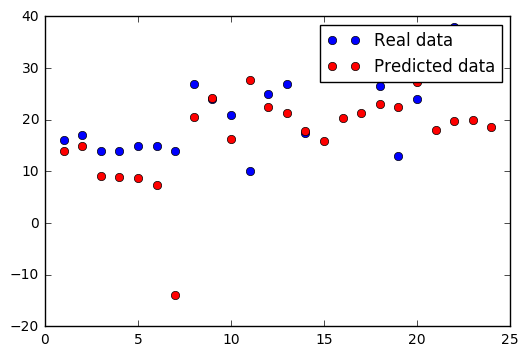

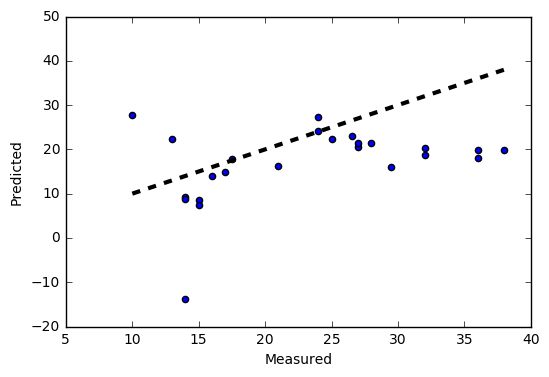

In [14]:
# Get predictions for Test dataset
test_X = test[:, 1:4]
test_Y = test[:, 4]
test_X = np.array(test_X)
test_Y = np.transpose([test_Y])

all_feed = {X: test_X, Y: test_Y}

pred_Y = sess.run(Y_predicted, feed_dict=all_feed)
RMSE_Test = sess.run(RMSE, feed_dict=all_feed)

square = np.square(test_Y - pred_Y)
#print("Sum of square errors: {0}".format(np.sum(square)))
#print("Root sum of square errors: {0}".format(math.sqrt(np.sum(square))))
print("Accuracy of the model, RMSE: {0}".format(RMSE_Test))

plt.plot(range(1, len(test) + 1), test_Y, 'bo', label='Real data')
plt.plot(range(1, len(test) + 1), pred_Y, 'ro', label='Predicted data')
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.scatter(test_Y, pred_Y)
ax.plot([test_Y.min(), test_Y.max()], [
        test_Y.min(), test_Y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [19]:
# Close the session
sess.close()

#### TensorBoard Cost Graph
![](img\hw9_p1\tb_cost.png)

#### TensorBoard Bias Distribution Graph
![](img\hw9_p1\tb_bias.png)

#### TensorBoard Weight Distribution Graph
![](img\hw9_p1\tb_weight.png)

#### TensorBoard Y Distribution Graph
![](img\hw9_p1\tb_y.png)

### Problem 2. 
Consider the attached file linear_regression.py and the attached data file fire_theft.xls. Compare results of this original solution to a solution with new feature quadratic in X (the number of fires), and then with a solution cubic in X. For all three solutions, plot the diagram of predicted values vs. original target values. You can have three different diagrams or you can present all those curves and data on one diagram. Either way is fine. Perform these calculations using the same set of parameters. Present TensorBoard Graphs for all three solutions and point to any differences between them.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#### Define function to normalize features

In [2]:
def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu) / sigma

#### Define function for linear regression with different parameters and scale

In [3]:
def analyse_fire_theft_regression(scale='linear',
                                  learning_rate=1.0e-3,
                                  num_of_epochs=100,
                                  data_file='data/fire_theft.xls',
                                  log_file='logs/fire_theft'):
    # Step 1: read in data from the .xls file
    book = xlrd.open_workbook(data_file, encoding_override="utf-8")
    sheet = book.sheet_by_index(0)
    data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
    n_samples = sheet.nrows - 1

    # Normalize features
    all_xs = feature_normalize(data.T[0])
    all_xs = np.transpose([all_xs])
    all_ys = np.transpose([data.T[1]])

    # Step 2: create placeholders for input X (number of fire) and label Y
    # (number of theft)
    X = tf.placeholder(tf.float32, [None, 1], name='X')
    Y = tf.placeholder(tf.float32, [None, 1], name='Y')

    # Step 3: create weight and bias, initialized to 0
    W1 = tf.Variable(tf.zeros([1, 1]), name="weights")
    W2 = tf.Variable(tf.zeros([1, 1]), name="weights")
    W3 = tf.Variable(tf.zeros([1, 1]), name="weights")
    B = tf.Variable(tf.zeros([1]), name="bias")

    # Step 4: build model to predict Y
    with tf.name_scope("Wx_b") as scope:
        # Linear by default
        Y_predicted = X * W1 + B

        if scale == 'quadratic':
            Y_predicted = X ** 2 * W2 + X * W1 + B
        if scale == 'cubic':
            Y_predicted = X ** 3 * W3 + X ** 2 * W2 + X * W1 + B

    # Add summary ops to collect data
    W_hist = tf.summary.histogram("weight", [W1, W2, W3])
    B_hist = tf.summary.histogram("biases", B)
    Y_hist = tf.summary.histogram("y", Y_predicted)

    # Step 5: use the square error as the loss function
    with tf.name_scope("loss") as scope:
        loss = tf.reduce_mean(tf.square(Y - Y_predicted), name='loss')
        los_sum = tf.summary.scalar("loss", loss)

    # Step 6: using gradient descent with learning rate of 0.01 to minimize
    # loss

    with tf.name_scope("train") as scope:
        train_step = tf.train.GradientDescentOptimizer(
            learning_rate).minimize(loss)

    # Calculate accuracy of the model using RMSE
    RMSE = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(Y, Y_predicted))))

    sess = tf.Session()

    # Merge all the summaries and write them out to logs
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter(log_file, sess.graph)

    init = tf.global_variables_initializer()
    sess.run(init)

    all_feed = {X: all_xs, Y: all_ys}

    for i in range(num_of_epochs):
        # Record summary data, and the accuracy every 10 steps
        if i % 10 == 0:
            result = sess.run(merged, feed_dict=all_feed)
            writer.add_summary(result, i)
        else:
            sess.run(train_step, feed_dict=all_feed)

        #if i % 10 == 0:
            #print("After %d iteration:" % i)
            #print("W: %s" % sess.run(W))
            #print("b: %f" % sess.run(B))
            #print("loss: %f" % sess.run(loss, feed_dict=all_feed))
            #print("RMSE: %f" % sess.run(RMSE, feed_dict=all_feed))
    
    B_val, W1_val, W2_val, W3_val = sess.run([B, W1, W2, W3])
    print("Type: {0}, B: {1} W1: {2}, W2: {3}, W3: {4}"
          .format(scale, B_val, W1_val, W2_val, W3_val))

    print("loss: {0}".format(sess.run(loss, feed_dict=all_feed)))
    print("RMSE: {0}".format(sess.run(RMSE, feed_dict=all_feed)))

    # Step 9: output the values of w and b
    all_feed = {X: all_xs}

    pred_Y = sess.run(Y_predicted, feed_dict=all_feed)

    writer.flush()
    writer.close()
    sess.close()

    X, Y = all_xs, all_ys
    plt.plot(X, Y, 'bo', label='Real data')
    plt.plot(X, pred_Y, 'ro', label='Predicted data')
    plt.xlabel('Standardized X')
    plt.ylabel('Y')

    plt.legend()
    plt.show()

    fig, ax = plt.subplots()
    ax.scatter(Y, pred_Y)
    ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=3)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

#### Parameters for Regression

In [4]:
DATA_FILE = 'data/fire_theft.xls'
LOG_FILE = 'logs/fire_theft'
LEARN_RATE = 1.0e-3
NUM_OF_EPOCHS = 1000

#### Linear regression in linear scale

Type: linear, B: [ 28.11161613] W1: [[ 10.47589397]], W2: [[ 0.]], W3: [[ 0.]]
loss: 395.964111328125
RMSE: 19.898847579956055


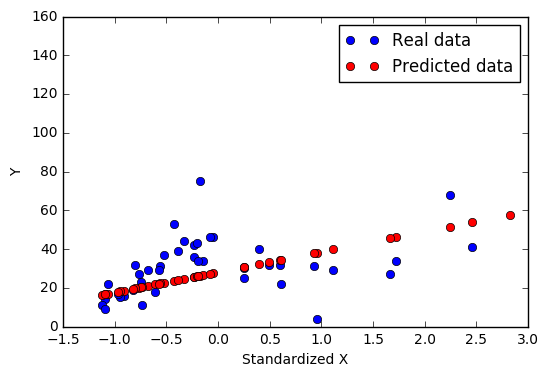

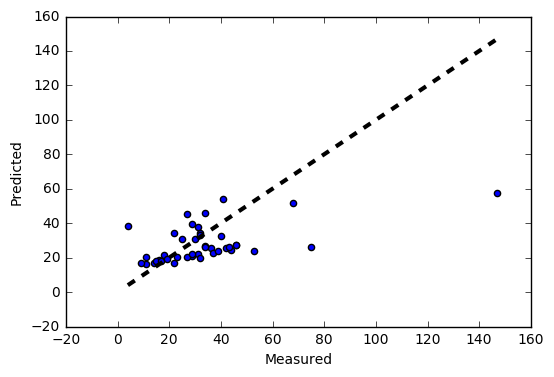

In [5]:
analyse_fire_theft_regression(scale='linear', learning_rate=LEARN_RATE, num_of_epochs=NUM_OF_EPOCHS)

#### Linear TensorBoard loss
![](img\hw9_p2\linear_loss.png)

#### Linear TensorBoard Bias Histogram
![](img\hw9_p2\linear_bias.png)

#### Linear TensorBoard Weight Histogram
![](img\hw9_p2\linear_weight.png)

#### Linear TensorBoard Y Histogram
![](img\hw9_p2\linear_y.png)

#### Quadratic scale

Type: quadratic, B: [ 19.83799744] W1: [[ 0.48119235]], W2: [[ 9.60485077]], W3: [[ 0.]]
loss: 380.387451171875
RMSE: 19.503524780273438


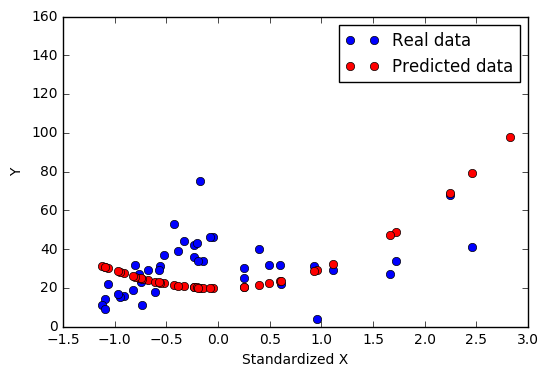

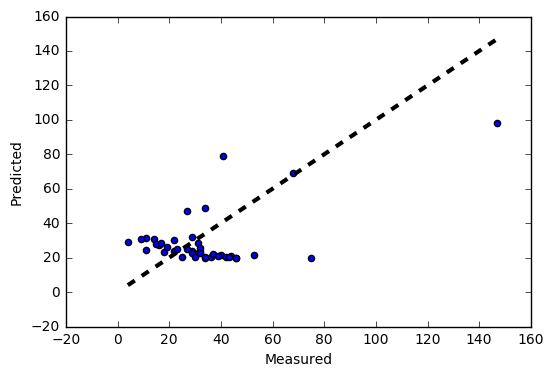

In [5]:
analyse_fire_theft_regression(scale='quadratic', learning_rate=LEARN_RATE, num_of_epochs=NUM_OF_EPOCHS)

#### Quadratic TensorBoard loss
![](img\hw9_p2\quad_loss.png)

#### Cubic scale

Type: cubic, B: [ 21.50963211] W1: [[-4.10484743]], W2: [[ 2.66494608]], W3: [[ 3.76151562]]
loss: 291.59600830078125
RMSE: 17.076183319091797


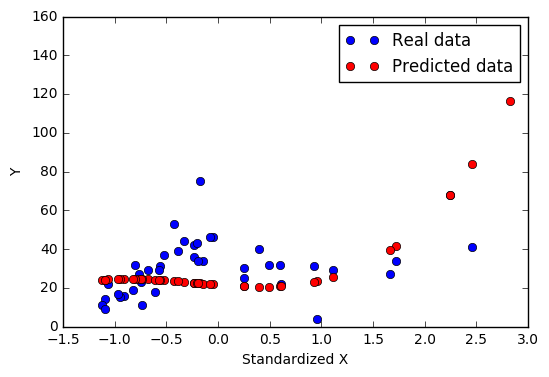

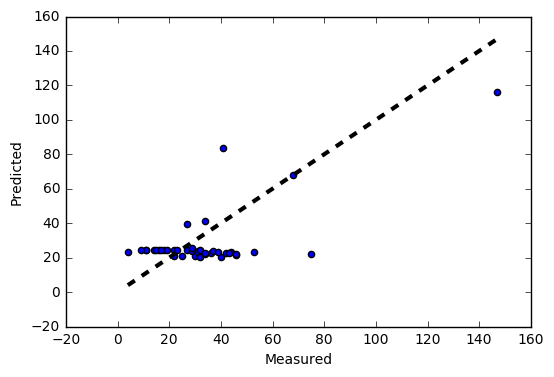

In [5]:
analyse_fire_theft_regression(scale='cubic', learning_rate=LEARN_RATE, num_of_epochs=NUM_OF_EPOCHS)

#### Cubic TensorBoard loss
![](img\hw9_p2\cubic_loss.png)

#### Conclusion
Looking at the loss graphs quadratic and cubic models converged quicker than linear model. We can see the both quadratic and cubic reduced loss to 600 in about 200 steps although linear model took 450 steps. Also we can see the RMSE dropped 19.90, 19.50, 17.08 in linear, quad and cubic models respectively.

### Problem 3. 
Consider the attached file logistic_regression_mnist.py. We have stated the results of that program in class but left many details unexplained. Search through TensorFlow API documentation and the Internet and describe for us what is the meaning and purpose of functions used in step 5 and step 6. Demonstrate that you can run the code successfully. Fetch for us the TensorBoard Graph. Vary parameter batch_size through values: 8, 64, 128, 256 and report and plot changes in the execution time and accuracy. Keep other parameters the same as in the original program. Similarly, vary parameter learning_rate through values 0.001, 0.005, 0.01, 0.02 and 0.05. Report and plot changes in the execution time and accuracy.


#### Search through TensorFlow API documentation and the Internet and describe for us what is the meaning and purpose of functions used in step 5 and step 6.

Cross-entropy can be used to mathematically compare similarity of two graphs. To use cross entropy, we need to convert both the actual outcome vector and the prediction outcome vector values into a probability distribution. We use softmax to transform prediction outcome to a probability distribution. In step 5 we use this probability error as the loss funstion.

Then in step 6 we use gradient descent as the optimizer. 

In [3]:
import time
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Define function for logistic regression with varying parameters

In [2]:
def analyse_logistic_regression_mnist(learning_rate=0.01,
                                      batch_size=128,
                                      n_epochs=30,
                                      log_file="logs/logistic_mnist",
                                      debug=False):
    # Step 1: Read in data
    # using TF Learn's built in function to load MNIST data to the folder mnist
    mnist = input_data.read_data_sets('./mnist', one_hot=True)

    # Step 2: create placeholders for features and labels
    # each image in the MNIST data is of shape 28*28 = 784
    # therefore, each image is represented with a 1x784 tensor
    # there are 10 classes for each image, corresponding to digits 0 - 9.
    # each lable is one hot vector.
    X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder')
    Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

    # Step 3: create weights and bias
    # w is initialized to random variables with mean of 0, stddev of 0.01
    # b is initialized to 0
    # shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
    # shape of b depends on Y
    w = tf.Variable(tf.random_normal(
        shape=[784, 10], stddev=0.01), name='weights')
    b = tf.Variable(tf.zeros([1, 10]), name="bias")

    # Step 4: build model
    # the model that returns the logits.
    # this logits will be later passed through softmax layer
    logits = tf.matmul(X, w) + b

    # Step 5: define loss function
    # use cross entropy of softmax of logits as the loss function
    entropy = tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y, name='loss')
    # computes the mean over all the examples in the batch
    loss = tf.reduce_mean(entropy)

    # Step 6: define training op
    # using gradient descent with learning rate of 0.01 to minimize loss
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    with tf.Session() as sess:
        # to visualize using TensorBoard
        writer = tf.summary.FileWriter(log_file, sess.graph)

        start_time = time.time()
        sess.run(tf.global_variables_initializer())
        n_batches = int(mnist.train.num_examples / batch_size)
        for i in range(n_epochs):  # train the model n_epochs times
            total_loss = 0

            for _ in range(n_batches):
                X_batch, Y_batch = mnist.train.next_batch(batch_size)
                _, loss_batch = sess.run([optimizer, loss],
                                         feed_dict={X: X_batch, Y: Y_batch})
                total_loss += loss_batch
            avg_loss = total_loss / n_batches
            if debug:
                print('Average loss epoch {0}: {1}'
                      .format(i, avg_loss))
        total_time = time.time() - start_time
        if debug:
            print('Total time: {0} seconds'.format(total_time))

        # should be around 0.35 after 25 epochs
        if debug:
            print('Optimization Finished!')

        # test the model
        n_batches = int(mnist.test.num_examples / batch_size)
        total_correct_preds = 0
        for i in range(n_batches):
            X_batch, Y_batch = mnist.test.next_batch(batch_size)
            _, loss_batch, logits_batch = sess.run(
                [optimizer, loss, logits], feed_dict={X: X_batch, Y: Y_batch})
            preds = tf.nn.softmax(logits_batch)
            correct_preds = tf.equal(
                tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
            accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
            total_correct_preds += sess.run(accuracy)

        accuracy = total_correct_preds / mnist.test.num_examples
        if debug:
            print('Accuracy {0}'.
                  format(accuracy))

        writer.close()
    print('Time: {0}, Avg. Loss: {1}, Accuracy: {2}'.
          format(total_time, avg_loss, accuracy))
    return [total_time, avg_loss, accuracy]


#### TensorBoard Graph
![](img\hw9_p3\tb_graph.png)

#### Vary parameter batch_size through values: 8, 64, 128, 256 and report and plot changes in the execution time and accuracy. Keep other parameters the same as in the original program. 

In [12]:
batch_sizes = [8, 64, 128, 256]
#batch_sizes = [128, 256]

batch_result = [analyse_logistic_regression_mnist(batch_size=x) for x in batch_sizes]

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Time: 78.24736404418945, Avg. Loss: 0.259334195193479, Accuracy: 0.9255
Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Time: 22.4779269695282, Avg. Loss: 0.30729271814105674, Accuracy: 0.9173
Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Time: 17.838057041168213, Avg. Loss: 0.3366956442316651, Accuracy: 0.9122
Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Time: 15.168068885803223, Avg. Loss: 0.37790684179167

#### Creating a dataframe to hold batch results

In [13]:
cols = ['Time', 'Loss', 'Accuracy']
df = pd.DataFrame(batch_result, index=batch_sizes, columns=cols)
df

,Time,Loss,Accuracy
8,78.247364,0.259334,0.9255
64,22.477927,0.307293,0.9173
128,17.838057,0.336696,0.9122
256,15.168069,0.377907,0.9041


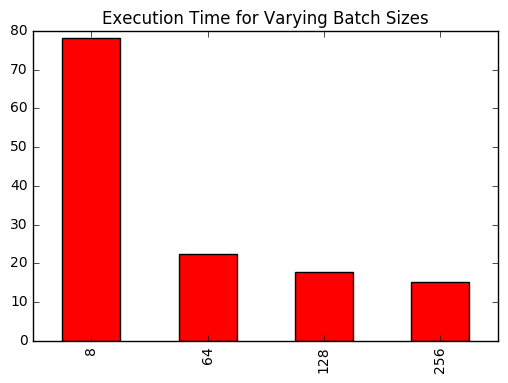

In [14]:
df.Time.plot(kind='bar', color='r', title='Execution Time for Varying Batch Sizes')

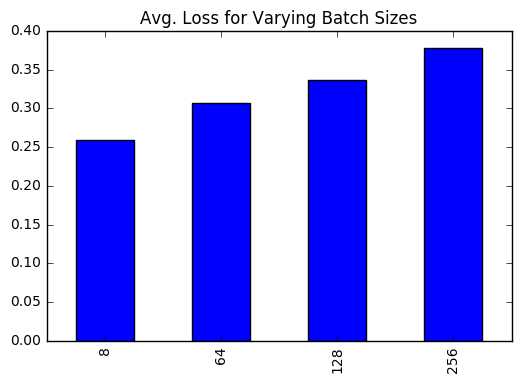

In [15]:
df.Loss.plot(kind='bar', color='b', title='Avg. Loss for Varying Batch Sizes')

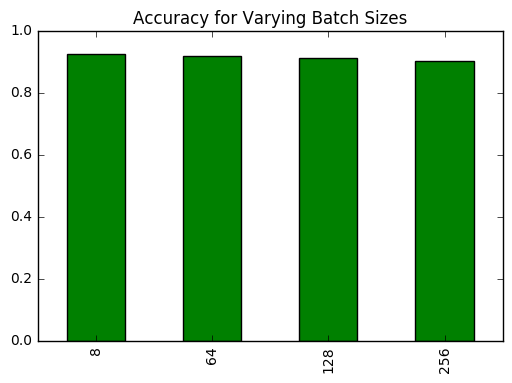

In [16]:
df.Accuracy.plot(kind='bar', color='g', title='Accuracy for Varying Batch Sizes')

#### Similarly, vary parameter learning_rate through values 0.001, 0.005, 0.01, 0.02 and 0.05. Report and plot changes in the execution time and accuracy.

In [17]:
learning_rates = [0.001, 0.005, 0.01, 0.02, 0.05]

batch_result = [analyse_logistic_regression_mnist(learning_rate=x) for x in learning_rates]

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Time: 19.71430516242981, Avg. Loss: 0.5647743087270599, Accuracy: 0.8753
Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Time: 18.63776993751526, Avg. Loss: 0.3773252709414853, Accuracy: 0.9041
Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Time: 19.455049991607666, Avg. Loss: 0.3368964605814927, Accuracy: 0.912
Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Time: 19.392534971237183, Avg. Loss: 0.30759092449864

#### Creating a dataframe with batch results

In [18]:
cols = ['Time', 'Loss', 'Accuracy']
df = pd.DataFrame(batch_result, index=learning_rates, columns=cols)
df

,Time,Loss,Accuracy
0.001,19.714305,0.564774,0.8753
0.005,18.637770,0.377325,0.9041
0.010,19.455050,0.336896,0.9120
0.020,19.392535,0.307591,0.9171
0.050,19.449577,0.280557,0.9223


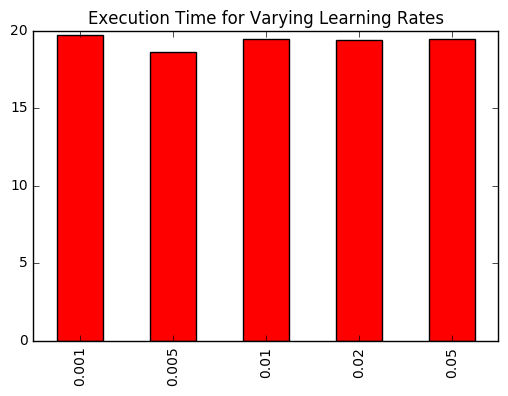

In [19]:
%matplotlib inline
df.Time.plot(kind='bar', color='r', title='Execution Time for Varying Learning Rates')

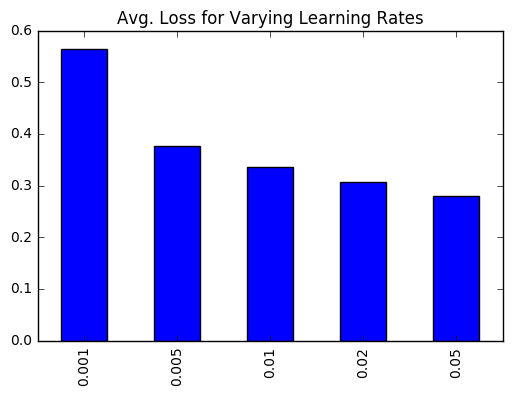

In [20]:
df.Loss.plot(kind='bar', color='b', title='Avg. Loss for Varying Learning Rates')

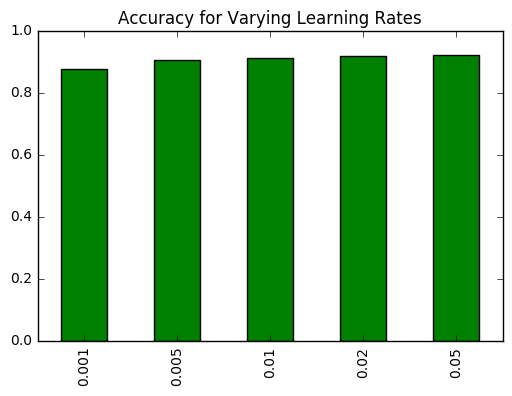

In [21]:
df.Accuracy.plot(kind='bar', color='g', title='Accuracy for Varying Learning Rates')